# Testing and regularization

In [4]:
!git clone https://github.com/AbdelrhmanElsaied/ml-1
%cd  ml-1/polynomial_regression

Cloning into 'ml-1'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 108 (delta 53), reused 108 (delta 53), pack-reused 0
Receiving objects: 100% (108/108), 29.74 MiB | 14.68 MiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/ml-1/polynomial_regression


In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

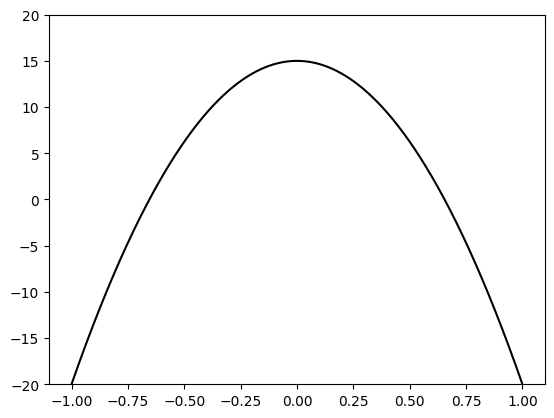

In [6]:
# Our original polynomial is -x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [7]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

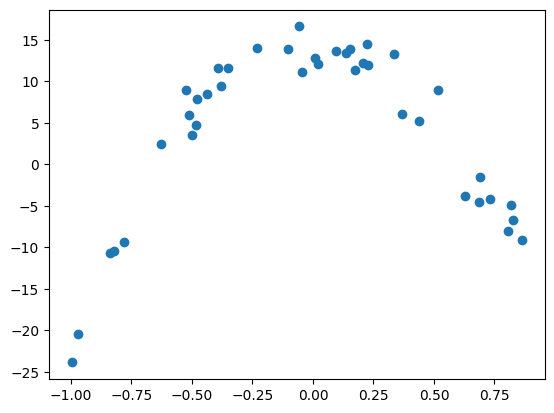

In [8]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [9]:
for datasample in zip(X,Y):
    print(datasample)

(0.6888437030500962, -1.503313676546703)
(-0.4821664994140733, 4.776223391096098)
(0.02254944273721704, 12.087957039273702)
(-0.3933745478421451, 11.552655381342872)
(-0.04680609169528838, 11.13939451533042)
(0.009373711634780513, 12.810729063756577)
(-0.43632431120059234, 8.437955069843738)
(-0.4989873172751189, 3.511211911084044)
(0.8194925119364802, -4.879955934160179)
(0.8043319008791654, -8.0368585173616)
(-0.37970486136133474, 9.412786903432224)
(0.36796786383088254, 6.014161594638752)
(-0.055714569094573285, 16.612588226930765)
(0.2217739468876032, 14.540743210654112)
(0.8260221064757964, -6.653701461777612)
(0.7306198555432801, -4.157483878852887)
(-0.47901537921608117, 7.82406268607659)
(-0.9719165996719621, -20.435354443047032)
(0.43940937280790826, 5.238271435416371)
(0.3363064024637017, 13.258006206843095)
(-0.9977143613711434, -23.858802994572372)
(-0.512178246225736, 5.980815567451724)
(-0.3495912745052199, 11.6168873009973)
(0.13502148124134372, 13.415138003037914)
(-0.5

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [10]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    X=X.reshape(-1,1)
    poly = PolynomialFeatures(degree=polyDegree , include_bias=False)
    X_poly = poly.fit_transform(X)
    #use sklearn (PolynomialFeatures method)

    return X_poly
X_poly=addPoly(X,200)

In [11]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[6.88843703e-01 4.74505647e-01 3.26860227e-01 2.25155609e-01
 1.55097024e-01 1.06837608e-01 7.35944136e-02 5.06950484e-02
 3.49209649e-02 2.40550867e-02 1.65701950e-02 1.14142745e-02
 7.86265112e-03 5.41613771e-03 3.73087236e-03 2.56998793e-03
 1.77032000e-03 1.21947379e-03 8.40026839e-04 5.78647198e-04
 3.98597479e-04 2.74571363e-04 1.89136755e-04 1.30285662e-04
 8.97464582e-05 6.18212826e-05 4.25852012e-05 2.93345477e-05
 2.02069185e-05 1.39194085e-05 9.58829693e-06 6.60483796e-06
 4.54970104e-06 3.13403291e-06 2.15885884e-06 1.48711632e-06
 1.02439071e-06 7.05645090e-07 4.86079177e-07 3.34832580e-07
 2.30647314e-07 1.58879950e-07 1.09443453e-07 7.53894335e-08
 5.19315366e-08 3.57727120e-08 2.46418074e-08 1.69743538e-08
 1.16926768e-08 8.05442676e-09 5.54824115e-09 3.82187098e-09
 2.63267176e-09 1.81349936e-09 1.24921762e-09 8.60515689e-10
 5.92760814e-10 4.08319554e-10 2.81268354e-10 1.93749934e-10
 1.33463422e-10 9.19354380e-11 6.33291475e-11 4.36238845e-11
 3.00500381e-1

## Splitting data into training and testing

In [12]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test =train_test_split(X_poly,Y,test_size=0.20)

In [13]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

[link text](https://)## Training a polynomial regression model with no regularization

In [14]:
from sklearn.linear_model import LinearRegression
## TODO ##
model_no_reg = LinearRegression()
model_no_reg.fit(X_train, y_train)
# y_pred =model_no_reg.predict(X_poly)
# use sklearn linear regression to fit the data
# normalization trick ;)



LinearRegression()

Training error (rmse): 0.0007897703569588121
Testing error (rmse): 10230.427972103704


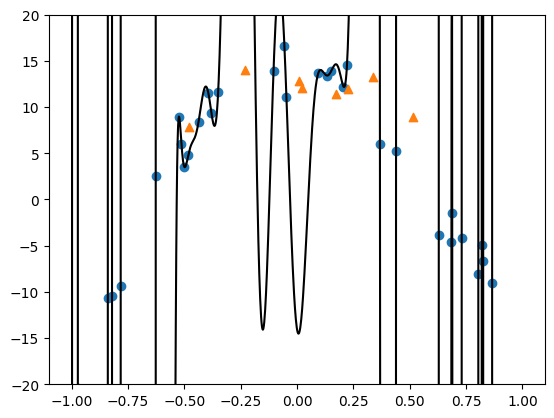

Polynomial coefficients
[-14.011302754050163, -152.05626891902023, 11309.428659928715, 4314.962589370988, -1379138.6089205244, 1917041.4622138925, 69766156.70391013, -119104471.86200525, -1828617152.6986442, 2637962833.7543283, 27968452178.606064, -27905003122.394207, -259621300938.09525, 155575649154.62585, 1478879005518.3838, -469121143841.3487, -5099678329655.22, 772616705385.5643, 9940455855517.92, -887432497435.808, -8239983574032.53, 1332875661733.5544, -3092510629610.892, -1075093515762.5938, 6624287951249.553, -1362169994999.0623, 4426824645806.132, 829765633030.8354, -2639296463730.441, 1990462229563.2576, -5716879383557.586, 1052870420655.899, -3552434851948.358, -593822873498.2689, 575866762803.3151, -1612124964696.2134, 3676516449231.633, -1649165039086.9934, 4517490816940.955, -1031106892989.6863, 3451372558162.4595, -243369168576.36124, 1406361136377.751, 429541146531.3322, -708259488918.3074, 834292906066.6051, -2354545856208.0444, 1000010424205.1553, -3251107804783.2617

In [15]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [24]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
## TODO ##
alpha = 0.1
lasso =Lasso(alpha=alpha)
model_L1_reg = lasso.fit(X_train, y_train)
# use sklearn Lasso (linear regression with L1 Norm) to fit the data
# normalization trick ;)



Training error (rmse): 1.9903864008036096
Testing error (rmse): 2.230462143602523


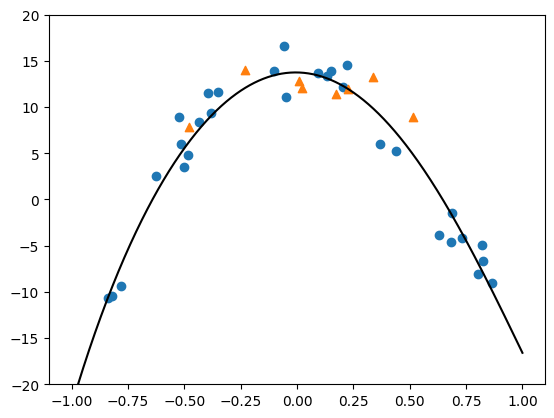

Polynomial coefficients
[13.748008374406005, -0.37007062083666037, -33.207790674143276, 0.0, -0.0, 3.2352756569338617, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -

In [25]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [26]:
from sklearn import linear_model
## TODO ##
alpha=0.5
ridge =linear_model.Ridge(alpha=alpha)
model_L2_reg =ridge.fit(X_train, y_train)
# use sklearn Ridge (linear regression with L2 Norm) to fit the data
# normalization trick ;)



Training error (rmse): 2.5089114881387435
Testing error (rmse): 2.557050031345343


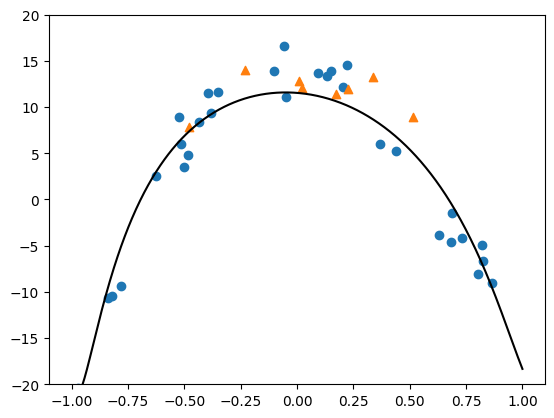

Polynomial coefficients
[11.536500483622355, -1.9059351889438743, -18.891666347945446, 1.1719526444052328, -9.52582520980038, 2.0192808874664903, -4.681957849607564, 1.7463350482324014, -2.2413644443491068, 1.2303821414143403, -0.9664949746230057, 0.7486210757940703, -0.28358789898971404, 0.37136828363068797, 0.08538272792089419, 0.09966526713119572, 0.282261378470009, -0.08564127835321433, 0.3825287597775985, -0.20616810088733373, 0.42771691757240615, -0.280326429411637, 0.44129010447114597, -0.3222261895493671, 0.4367792105368662, -0.3421342945204188, 0.4221060925763435, -0.3473096203493317, 0.40195582695466864, -0.34279705937948146, 0.37911309979415386, -0.3320646222745066, 0.35523189854325465, -0.31747802007305737, 0.33128690823774054, -0.3006408076810342, 0.30784209587591044, -0.2826329568281825, 0.2852123301033003, -0.26417611468920676, 0.26356146119007884, -0.24574726488133686, 0.24296219800144414, -0.2276565996226163, 0.22343279750384576, -0.2101007751771128, 0.2049595791048495

In [27]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [28]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,0.225546,11.960141,16.549623,11.977110,10.134979
1,0.336306,13.258006,528.888235,9.881602,8.684010
2,0.022549,12.087957,-11.976721,13.722778,11.483928
3,0.515208,8.950653,28940.211660,4.860140,5.022870
4,-0.230198,14.057973,104.351618,12.071393,10.931027
5,0.175234,11.390800,14.615922,12.663982,10.619938
6,0.009374,12.810729,-14.449823,13.741622,11.516976
7,-0.479015,7.824063,5.116445,6.223966,7.357978


### Real Example (Predict fuel efficiency)

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [30]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [31]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### normal linear regression

In [33]:
# normal linear regression
X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]
X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

model_no_reg = LinearRegression()
model_no_reg.fit(X_train, y_train)
ytest_predict=model_no_reg.predict(X_test)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.5639128558497175


#### using 50th order

In [34]:
X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X
X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)

##### no regularization

In [36]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

94.67301035368978


##### lasso regularization

In [38]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.01,)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3.730447503028277


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.200e+03, tolerance: 1.870e+00
  model = cd_fast.enet_coordinate_descent(


##### ridge regularization

In [40]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.01,)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

14.127761472161627
